In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def featureInfo(data):
    """
    Function untuk mengetahui informasi dari feature
    """
    row = []

    for i in data.columns:
        row.append([i, 
                     data[i].dtype, 
                     data[i].isna().sum(), 
                     data[i].isna().sum()/len(data)*100, 
                     data[i].count(),
                     data[i].nunique(), 
                     data[i].unique()[0:4]])
    
    kolom = ["feature", "data_type", "null_sum", "null_persen", "count","count_unique", "sample"]
    tabel = pd.DataFrame(data=row, columns=kolom)
    print("Banyak data duplikat:", data.duplicated().sum())
    return tabel

# Application Train

In [6]:
application_train = pd.read_csv("application_train.csv")
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
atr = featureInfo(application_train)
print("Jumlah null_persen diatas 5%:", atr[atr["null_persen"]>5]["feature"].count())
atr

Banyak data duplikat: 0
Jumlah null_persen diatas 5%: 57


,feature,data_type,null_sum,null_persen,count,count_unique,sample
0,SK_ID_CURR,int64,0,0.000000,307511,307511,"[100002, 100003, 100004, 100006]"
1,TARGET,int64,0,0.000000,307511,2,"[1, 0]"
2,NAME_CONTRACT_TYPE,object,0,0.000000,307511,2,"[Cash loans, Revolving loans]"
3,CODE_GENDER,object,0,0.000000,307511,3,"[M, F, XNA]"
4,FLAG_OWN_CAR,object,0,0.000000,307511,2,"[N, Y]"
...,...,...,...,...,...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,float64,41519,13.501631,265992,9,"[0.0, nan, 1.0, 3.0]"
118,AMT_REQ_CREDIT_BUREAU_WEEK,float64,41519,13.501631,265992,9,"[0.0, nan, 1.0, 3.0]"
119,AMT_REQ_CREDIT_BUREAU_MON,float64,41519,13.501631,265992,24,"[0.0, nan, 1.0, 2.0]"
120,AMT_REQ_CREDIT_BUREAU_QRT,float64,41519,13.501631,265992,11,"[0.0, nan, 1.0, 2.0]"


# Installment Payments

In [11]:
installments_payments = pd.read_csv("installments_payments.csv")

In [53]:
installments_payments.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [11]:
ip = featureInfo(installments_payments)
ip

Banyak data duplikat: 0


,feature,data_type,null_sum,null_persen,count,count_unique,sample
0,SK_ID_PREV,int64,0,0.000000,13605401,997752,"[1054186, 1330831, 2085231, 2452527]"
1,SK_ID_CURR,int64,0,0.000000,13605401,339587,"[161674, 151639, 193053, 199697]"
2,NUM_INSTALMENT_VERSION,float64,0,0.000000,13605401,65,"[1.0, 0.0, 2.0, 4.0]"
3,NUM_INSTALMENT_NUMBER,int64,0,0.000000,13605401,277,"[6, 34, 1, 3]"
4,DAYS_INSTALMENT,float64,0,0.000000,13605401,2922,"[-1180.0, -2156.0, -63.0, -2418.0]"
5,DAYS_ENTRY_PAYMENT,float64,2905,0.021352,13602496,3039,"[-1187.0, -2156.0, -63.0, -2426.0]"
6,AMT_INSTALMENT,float64,0,0.000000,13605401,902539,"[6948.36, 1716.525, 25425.0, 24350.13]"
7,AMT_PAYMENT,float64,2905,0.021352,13602496,944235,"[6948.36, 1716.525, 25425.0, 24350.13]"


# Installment Payment Target

In [12]:
ip_target = installments_payments.merge(application_train[["SK_ID_CURR", "TARGET"]],
                                       how="left",
                                       on="SK_ID_CURR"
                                  )

In [216]:
featureInfo(ip_target)

Banyak data duplikat: 0


,feature,data_type,null_sum,null_persen,count,count_unique,sample
0,SK_ID_PREV,int64,0,0.000000,13605401,997752,"[1054186, 1330831, 2085231, 2452527]"
1,SK_ID_CURR,int64,0,0.000000,13605401,339587,"[161674, 151639, 193053, 199697]"
2,NUM_INSTALMENT_VERSION,float64,0,0.000000,13605401,65,"[1.0, 0.0, 2.0, 4.0]"
3,NUM_INSTALMENT_NUMBER,int64,0,0.000000,13605401,277,"[6, 34, 1, 3]"
4,DAYS_INSTALMENT,float64,0,0.000000,13605401,2922,"[-1180.0, -2156.0, -63.0, -2418.0]"
5,DAYS_ENTRY_PAYMENT,float64,2905,0.021352,13602496,3039,"[-1187.0, -2156.0, -63.0, -2426.0]"
6,AMT_INSTALMENT,float64,0,0.000000,13605401,902539,"[6948.36, 1716.525, 25425.0, 24350.13]"
7,AMT_PAYMENT,float64,2905,0.021352,13602496,944235,"[6948.36, 1716.525, 25425.0, 24350.13]"
8,TARGET,float64,2013809,14.801541,11591592,2,"[0.0, nan, 1.0]"


In [57]:
ip_target.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TARGET
count,1.159159e+07,1.159159e+07,1.159159e+07,1.159159e+07,1.159159e+07,1.158901e+07,1.159159e+07,1.158901e+07,1.159159e+07
mean,1.903552e+06,2.785345e+05,8.509618e-01,1.873027e+01,-1.041082e+03,-1.049898e+03,1.691790e+04,1.707693e+04,7.593892e-02
std,5.362314e+05,1.026410e+05,1.002910e+00,2.649067e+01,7.994779e+02,7.990790e+02,5.033127e+04,5.445628e+04,2.649004e-01
min,1.000001e+06,1.000020e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434524e+06,1.897190e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.663000e+03,4.203675e+03,3.378375e+03,0.000000e+00
50%,1.896635e+06,2.788280e+05,1.000000e+00,8.000000e+00,-8.200000e+02,-8.290000e+02,8.787645e+03,8.095410e+03,0.000000e+00
75%,2.369256e+06,3.675090e+05,1.000000e+00,1.900000e+01,-3.590000e+02,-3.680000e+02,1.655559e+04,1.593193e+04,0.000000e+00
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06,1.000000e+00


## No. 1 Descriptive Statistics  
- Semua kolom mempunyai tipe data yang sudah sesuai
- Ada 2 kolom yang mempunyai nilai null, kolom `DAYS_ENTRY_PAYMENT` dan `AMT_PAYMENT` mempunyai 2905 nilai null atau sebesar 0.02%. Jika dilakukan left join dengan target, maka target mempunyai 2,013,809 nilai null atau sebesar 14.8%
- Hampir semua kolom mempunyai summary yang aneh:
    - Kolom `NUM_INSTALMENT_VERSION` dan `NUM_INSTALMENT_NUMBER` mempunyai nilai max yang sangat tinggi sehingga ada potensi outlier dan terlihat juga ada potensi skew yang terlihat dari perbedaan mean dengan median.
    - Kolom `DAYS_INSTALMENT` dan `DAYS_ENTRY_PAYMENT` mempunyai perbedaan nilai median dengan mean yang berarti berpotensi skew, dan kolom `DAYS_ENTRY_PAYMENT` mempunyai nilai min yang sangat tinggi sehingga ada potensi outlier.
    - Kolom `AMT_INSTALMENT` dan `AMT_PAYMENT` mempunyai nilai max yang sangat tinggi sehingga ada potensi outlier dan mempunyai perbedaan mean dengan median sehingga berpotensi skew.

In [17]:
ip_target_columns = []
for i in ip_target.columns:
    ip_target_columns.append(i)

# ip_target_columns

## Distribution

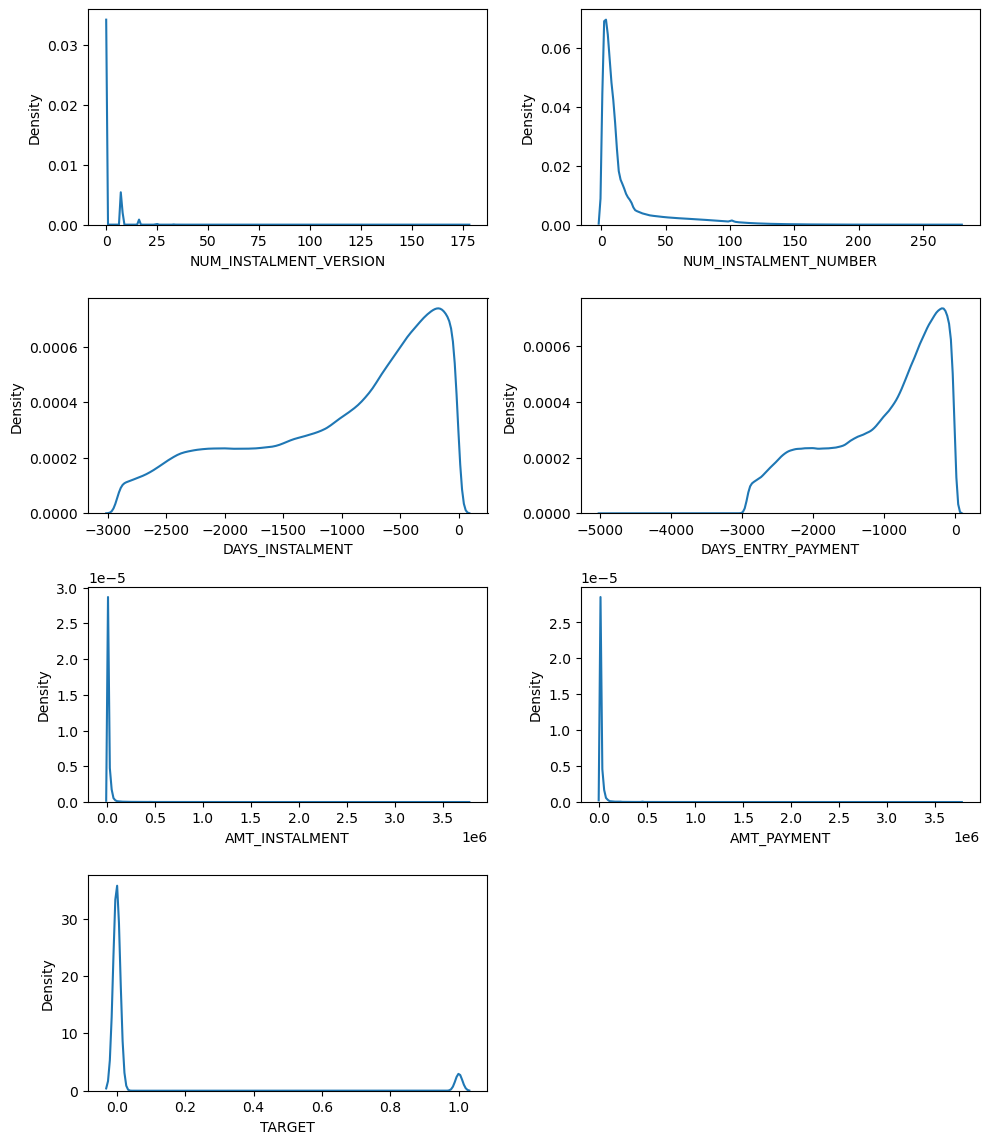

In [69]:
plt.figure(figsize=(10,14))
for i in range(len(ip_target_columns)-2):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=ip_target[ip_target_columns[i+2]])
    plt.tight_layout()

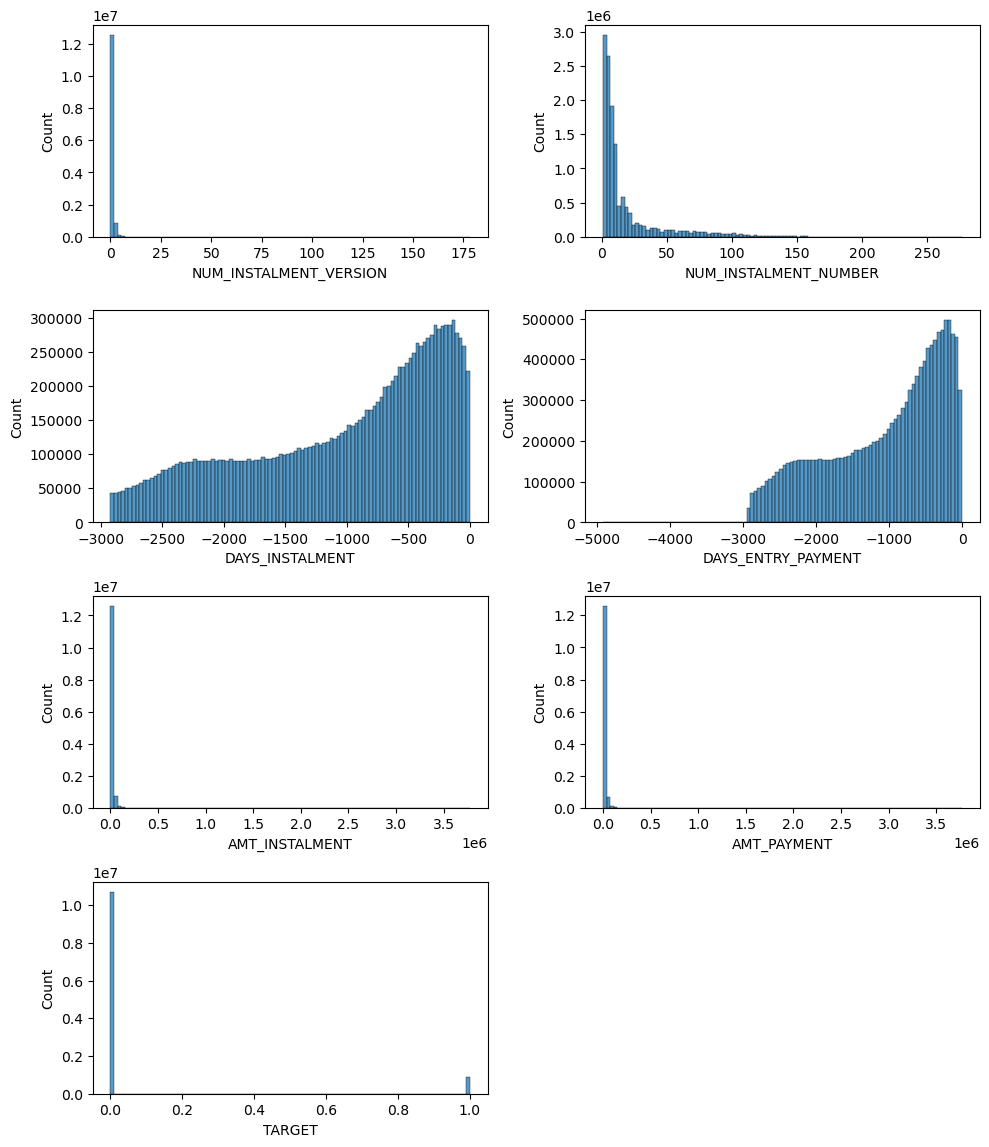

In [26]:
plt.figure(figsize=(10,14))
for i in range(len(ip_target_columns)-2):
    plt.subplot(5, 2, i+1)
    sns.histplot(x=ip_target[ip_target_columns[i+2]], bins=100)
    plt.tight_layout()

In [267]:
print("Persentase jumlah data TARGET 1:", (ip_target[ip_target["TARGET"] == 1]["TARGET"]).count()/ip_target["TARGET"].count()*100, "%")

Persentase jumlah data TARGET 1: 7.5938921935830725 %


## Boxenplot

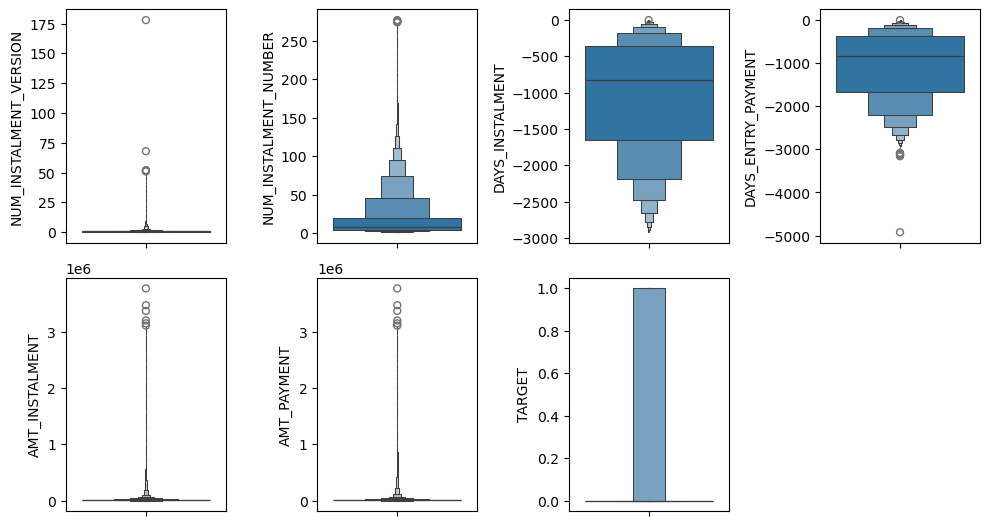

In [75]:
plt.figure(figsize=(10,8))
for i in range(len(ip_target_columns)-2):
    plt.subplot(3, 4, i+1)
    sns.boxenplot(y=ip_target[ip_target_columns[i+2]])
    plt.tight_layout()

## No.2 Univariate Analysis
   
   - Kolom `NUM_INSTALMENT_VERSION` menunjukkan adanya positive skew yang sangat tajam dan terlihat ada data max yang sangat tinggi sehingga bisa dikatakan ada outlier. Pada pre-processing harus dilakukan outlier handling dan transformasi fitur.
   - Kolom `NUM_INSTALMENT_NUMBER` menunjukkan adanya positive skew dan terlihat ada data max yang sangat tinggi sehingga bisa dikatakan ada outlier. Pada pre-processing harus dilakukan outlier handling dan transformasi fitur.
   - Kolom `DAYS_INSTALMENT` menunjukkan adanya negative skew dan tidak terlalu ada nilai min/max yang sangat timpang. Pada pre-processing harus dilakukan transformasi fitur.
   - Kolom `DAYS_ENTRY_PAYMENT` menunjukkan adanya negative skew juga tetapi pada kolom ini terlihat ada data dengan min yang sangat rendah sehingga bisa dikatakan ada outlier. Pada pre-processing harus dilakukan pengisian missing values, outlier handling dan transformasi fitur.
   - Kolom `AMT_INSTALMENT` dan `AMT_PAYMENT` menunjukkan adanya positive skew yang sangat tajam dan terlihat ada data max yang sangat tinggi sehingga bisa dikatakan ada outlier. Pada pre-processing harus dilakukan outlier handling dan transformasi fitur dan untuk kolom `AMT_PAYMENT` dilakukan pengisian missing values.
   - Kolom `TARGET` yang merupakan label menunjukkan distribusi bimodal dan terlihat adanya class imbalance kategori sedang karena masih diantara 1%-20%. Pada pre-processing harus dilakukan class imbalance handling dan pengisian missing values.

## Heatmap

<Axes: >

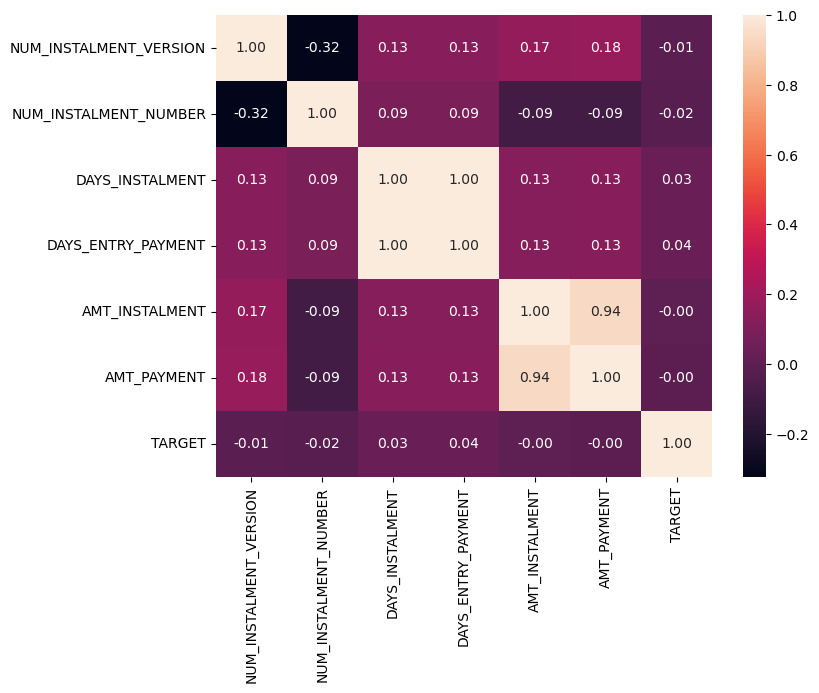

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(ip_target[ip_target_columns[2::]].corr(), color="Red", annot=True, fmt=".2f")

## No.3 Multivariate Analysis

- Tidak ada korelasi antara fitur dengan target, fitur yang dapat dipertahankan adalah:
    - `NUM_INSTALMENT_VERSION`
    - `NUM_INSTALMENT_NUMBER`
    - `DAYS_ENTRY_PAYMENT`
    - `AMT_PAYMENT`
    - `TARGET`
- Ada korelasi antar fitur yaitu `DAYS_INSTALMENT` dengan `DAYS_ENTRY_PAYMENT` dan `AMT_INSTALMENT` dengan `AMT_PAYMENT`. Karena ada fitur yang redundan, maka akan ada fitur yang tidak dipakai.

## Target VS Days and AMT

In [22]:
amount_persen = ip_target.groupby("TARGET").agg({"AMT_INSTALMENT":"median",
                                                 "AMT_PAYMENT":"median"
                                                }).reset_index()
amount_persen["AMT_PERCENTAGE"] = 100-(amount_persen["AMT_PAYMENT"]/amount_persen["AMT_INSTALMENT"]*100)
amount_persen

,TARGET,AMT_INSTALMENT,AMT_PAYMENT,AMT_PERCENTAGE
0,0.0,8839.845,8100.00,8.369434
1,1.0,8194.320,7278.12,11.180916


In [24]:
days_persen = ip_target.groupby("TARGET").agg({"DAYS_INSTALMENT": "median",
                                               "DAYS_ENTRY_PAYMENT":"median"
                                                }).reset_index()
days_persen["DAYS_PERCENTAGE"] = (days_persen["DAYS_ENTRY_PAYMENT"]-days_persen["DAYS_INSTALMENT"])/days_persen["DAYS_INSTALMENT"]*100
days_persen

,TARGET,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,DAYS_PERCENTAGE
0,0.0,-832.0,-840.0,0.961538
1,1.0,-694.0,-702.0,1.152738


In [26]:
amount_median = ip_target.groupby("TARGET").agg({"AMT_INSTALMENT":"median",
                                  "AMT_PAYMENT":"median",
                                "DAYS_INSTALMENT": "median",
                                "DAYS_ENTRY_PAYMENT":"median"}).reset_index()
amount_median

,TARGET,AMT_INSTALMENT,AMT_PAYMENT,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT
0,0.0,8839.845,8100.00,-832.0,-840.0
1,1.0,8194.320,7278.12,-694.0,-702.0


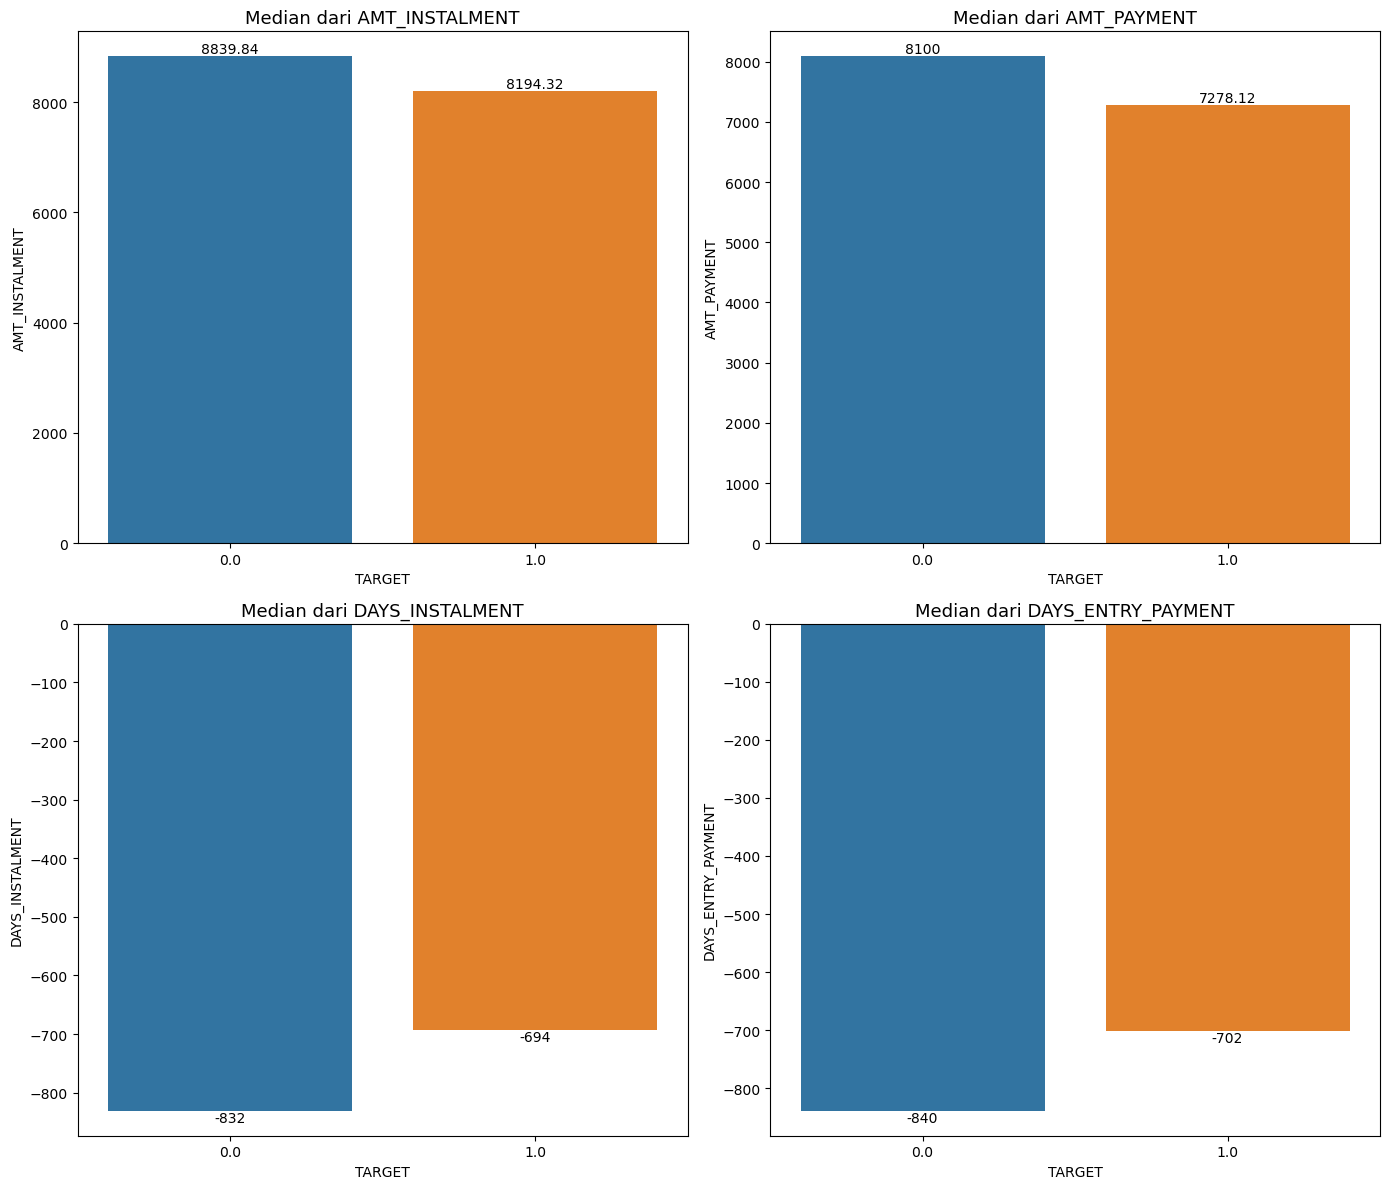

In [76]:
amt = amount_median.columns.tolist()[1::]
plt.figure(figsize=(14,12))
for i in range(len(amt)):
    plt.subplot(2, 2, i+1)
    ax = sns.barplot(x=amount_median["TARGET"], y=amount_median[amt[i]], hue=amount_median["TARGET"], legend=False)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.title(f"Median dari {amt[i]}", fontsize=13)
    plt.tight_layout()

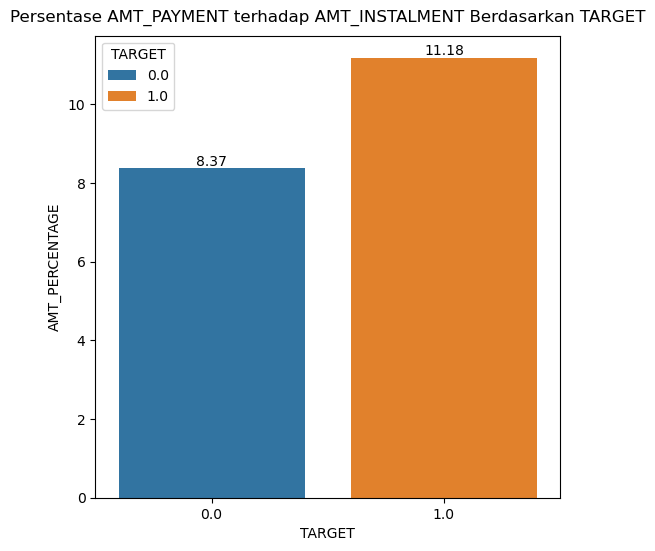

In [34]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x=amount_persen["TARGET"], y=amount_persen["AMT_PERCENTAGE"], hue=amount_persen["TARGET"])
ax.bar_label(ax.containers[0], fmt="%.2f")
ax.bar_label(ax.containers[1], fmt="%.2f")
plt.title("Persentase AMT_PAYMENT terhadap AMT_INSTALMENT Berdasarkan TARGET", pad=10)
plt.show()

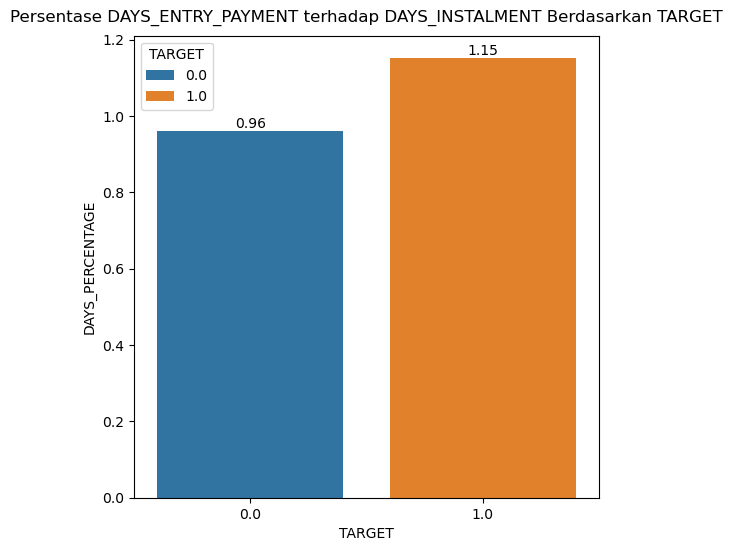

In [32]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x=days_persen["TARGET"], y=days_persen["DAYS_PERCENTAGE"], hue=days_persen["TARGET"])
ax.bar_label(ax.containers[0], fmt="%.2f")
ax.bar_label(ax.containers[1], fmt="%.2f")
plt.title("Persentase DAYS_ENTRY_PAYMENT terhadap DAYS_INSTALMENT Berdasarkan TARGET", pad=10)
plt.show()

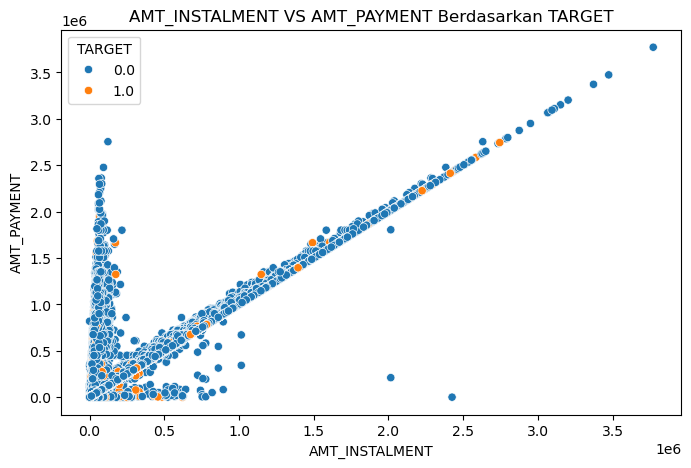

In [46]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="AMT_INSTALMENT", y="AMT_PAYMENT", hue="TARGET", data=ip_target)
plt.title("AMT_INSTALMENT VS AMT_PAYMENT Berdasarkan TARGET")
plt.show()

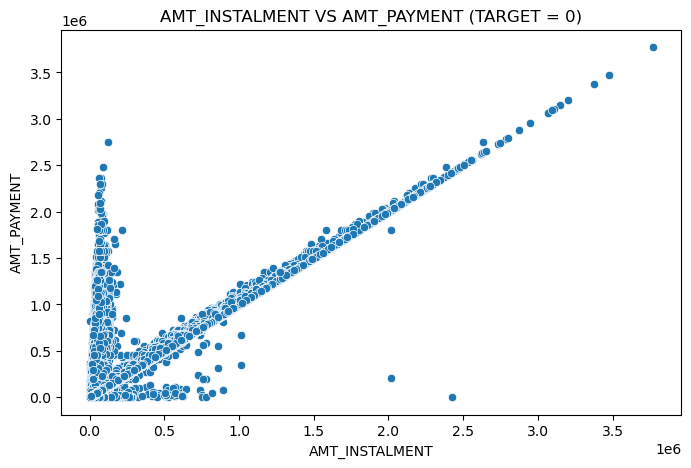

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="AMT_INSTALMENT", y="AMT_PAYMENT", data=ip_target[ip_target["TARGET"]== 0])
plt.title("AMT_INSTALMENT VS AMT_PAYMENT (TARGET = 0)")
plt.show()

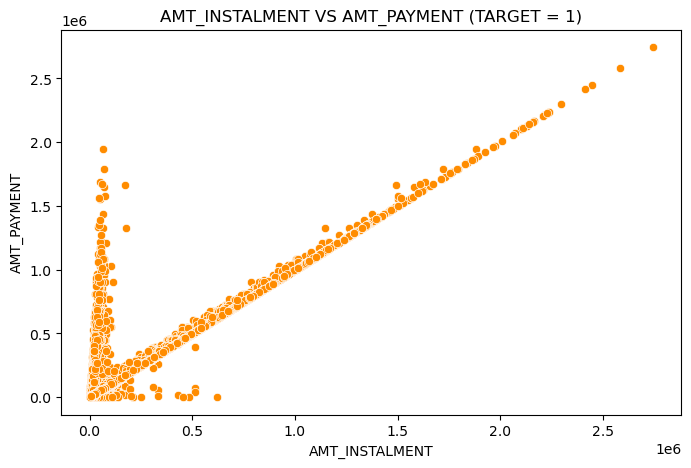

In [45]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="AMT_INSTALMENT", y="AMT_PAYMENT", data=ip_target[ip_target["TARGET"]== 1], color="darkorange")
plt.title("AMT_INSTALMENT VS AMT_PAYMENT (TARGET = 1)")
plt.show()

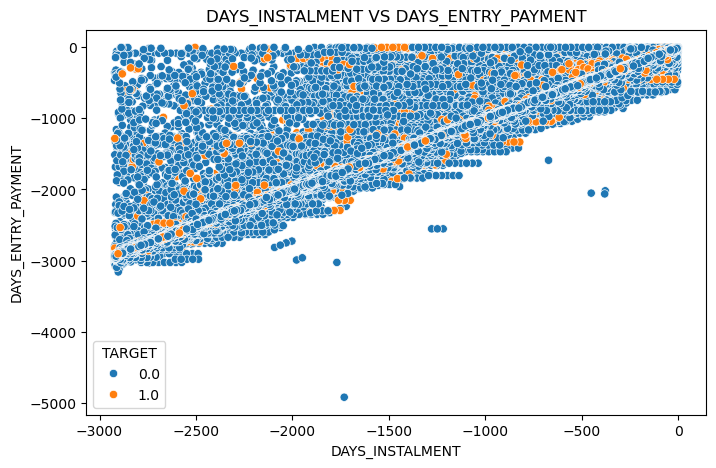

In [68]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="DAYS_INSTALMENT", y="DAYS_ENTRY_PAYMENT", hue="TARGET", data=ip_target)
plt.title("DAYS_INSTALMENT VS DAYS_ENTRY_PAYMENT")
plt.show()

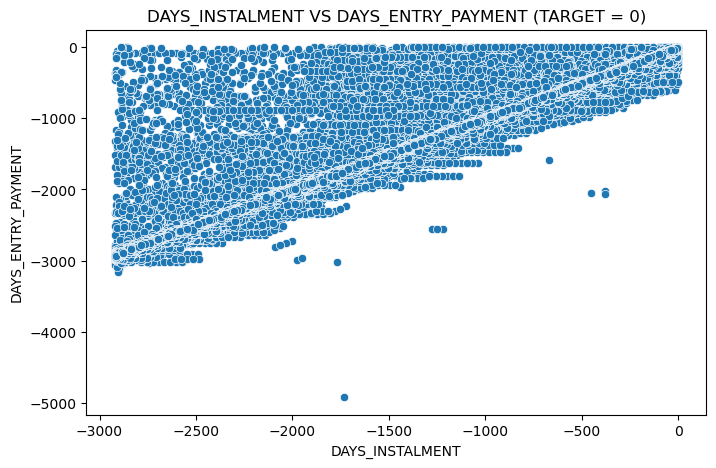

In [56]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="DAYS_INSTALMENT", y="DAYS_ENTRY_PAYMENT", data=ip_target[ip_target["TARGET"]==0])
plt.title("DAYS_INSTALMENT VS DAYS_ENTRY_PAYMENT (TARGET = 0)")
plt.show()

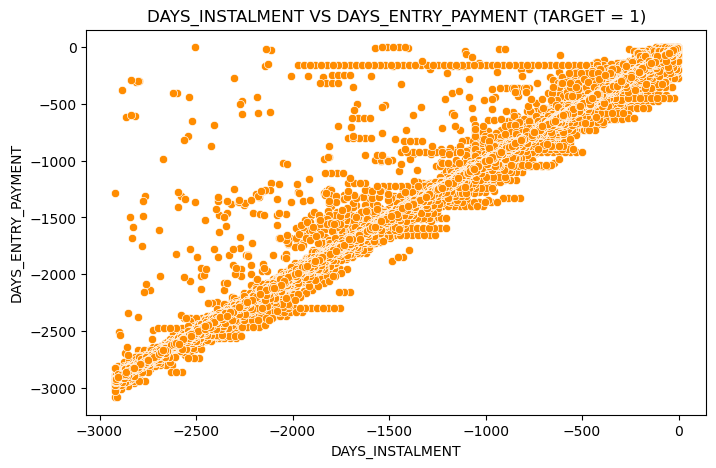

In [58]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="DAYS_INSTALMENT", y="DAYS_ENTRY_PAYMENT", data=ip_target[ip_target["TARGET"]==1], color="darkorange")
plt.title("DAYS_INSTALMENT VS DAYS_ENTRY_PAYMENT (TARGET = 1)")
plt.show()

## No.4 Business Insight

- Persentase perbedaan median dari `AMT_INSTALMENT` dan `AMT_ENTRY_PAYMENT` pada target 0 lebih kecil dibandingkan target 1. Hal ini menunjukkan target 1 lebih kesusahan untuk membayar nilai installment yang sudah ditentukan dibandingkan target 0.
- Fitur `DAYS_INSTALMENT` dan `DAYS_ENTRY_PAYMENT` pada target 0 juga mempunyai perbedaan persentase median yang lebih kecil dibandingkan target 1. Hal ini menunjukkan bahwa target 1 cenderung membayar sedikit lebih telat dibandingkan target 0.
- Perbandingan dari `AMT_INSTALMENT` dengan `AMT_PAYMENT` tidak menunjukkan adanya perbedaan pola yang signifikan antara target 0 dengan 1.
- Perbandingan `DAYS_INSTALMENT` dengan `DAYS_ENTRY_PAYMENT` menunjukkan perbedaan pola. Target 1 menunjukkan pola korelasi yang lebih linear dan beraturan dibanding dengan target 0. Pola target 1 menunjukkan bahwa pengguna cenderung membayar tepat pada waktu yang ditentukan, sedangkan pola dari target 0 menunjukkan bahwa pengguna cenderung membayar sebelum batas waktu yang ditentukan.